In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Project: Investigate the Soccer Database

# Introduction
Data set chose: Soccer Database
This soccer database comes from Kaggle, it contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. in this dataset, we have tables: Country, League, Match, Player, Player_Attributes, Team, Team_Attributes. The table Match is the biggest with 25979 records and 100 columns or variables. 
For this project, we will work with 4 tables: Player, Player_Attributes, Team, Team_Attributes. We will conduct two separated analysis on the Teams and Players. For the purposes of the project, we will drop some variables from Player_Attributes and Team_Attributes. the following questions will be considered, while our investigation will go beyond:
1.	What teams improved the most over the time period? 
2.	Which players had the most penalties? 
3.	What team attributes lead to the most victories?

## Data Wrangling-interacting with database
Before starting with the analysis we need to get our data ready for. the first step will be to connect with the database, using Python's built-in sqlalchemy and create_engine function :

In [2]:
from sqlalchemy import create_engine
engine=create_engine("sqlite:///database.sqlite")
print(engine.table_names())

['Country', 'League', 'Match', 'Player', 'Player_Attributes', 'Team', 'Team_Attributes', 'sqlite_sequence']


## reading of tables: Team, Team_Attributes,Player, Player_Attributes
to do so we will use query"""     """

# read and explore the Team table

In [3]:
query="""
SELECT * FROM 'Team';
"""
Team=pd.read_sql(query,engine)
print(Team.head())

   id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987             673.0           KRC Genk             GEN
1   2         9993             675.0       Beerschot AC             BAC
2   3        10000           15005.0   SV Zulte-Waregem             ZUL
3   4         9994            2007.0   Sporting Lokeren             LOK
4   5         9984            1750.0  KSV Cercle Brugge             CEB


In [21]:
Team.dtypes
Team.info()
Team.shape
Team.nunique
for i,v in enumerate(Team.columns):
    print(i,v)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB
0 id
1 team_api_id
2 team_fifa_api_id
3 team_long_name
4 team_short_name


The table Team has 299 records and 5 colums or variables. We have some missing values for team_fifa_api_id, but we cannot fill them since it's about id.

# What teams improved the most over the time period? 
from the table Team, we don't have any variables which can help to answer this question. We suggest to join through an inner join the two tables 'Team' and 'Team_Attributes'. We will start by reading the table 'Team_Attributes' for data wrangling.

# read and explore the Team_Attributes table

In [13]:
query="""
SELECT * FROM 'Team_Attributes';
"""
Team_Attribute=pd.read_sql(query,engine)
print(Team_Attribute.head())

   id  team_fifa_api_id  team_api_id                 date  buildUpPlaySpeed  \
0   1               434         9930  2010-02-22 00:00:00                60   
1   2               434         9930  2014-09-19 00:00:00                52   
2   3               434         9930  2015-09-10 00:00:00                47   
3   4                77         8485  2010-02-22 00:00:00                70   
4   5                77         8485  2011-02-22 00:00:00                47   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                  48.0                    Normal   
2              Balanced                  41.0                    Normal   
3                  Fast                   NaN                    Little   
4              Balanced                   NaN                    Little   

   buildUpPlayPassing buildUpPlayPassingClass  ... chanceCreationShooting 

In [22]:
Team.shape

(299, 5)

In [23]:
Team_Attribute.dtypes
Team_Attribute.info()
for i,v in enumerate(Team_Attribute.columns):
    print(i,v)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
id                                1458 non-null int64
team_fifa_api_id                  1458 non-null int64
team_api_id                       1458 non-null int64
date                              1458 non-null object
buildUpPlaySpeed                  1458 non-null int64
buildUpPlaySpeedClass             1458 non-null object
buildUpPlayDribbling              489 non-null float64
buildUpPlayDribblingClass         1458 non-null object
buildUpPlayPassing                1458 non-null int64
buildUpPlayPassingClass           1458 non-null object
buildUpPlayPositioningClass       1458 non-null object
chanceCreationPassing             1458 non-null int64
chanceCreationPassingClass        1458 non-null object
chanceCreationCrossing            1458 non-null int64
chanceCreationCrossingClass       1458 non-null object
chanceCreationShooting            1458 non-null int64
chanceCreationShootin

In this table, there are too much missing data for the variable 'BuildUpPlayDribbling', then we will drop it. 

Dropping of 'buildUpPlayDribbling'

In [16]:
Team_Attribute.drop(['buildUpPlayDribbling'],axis=1,inplace=True)

For analysis purpose we need the name of the teams and specific variables, we will join the two tables 'Team' and 'Team_Attribute' through an Inner Join and keep the following variables: team_api_id, team_fifa_api_id,team_long_name,date,buildUpPlaySpeed,chanceCreationShooting.

In [54]:
query="""
select team_long_name,Team_Attributes.team_fifa_api_id,Team_Attributes.team_api_id,Team_Attributes.date,Team_Attributes.buildUpPlaySpeed,Team_Attributes.chanceCreationShooting,buildUpPlayPassing
from Team
inner join Team_Attributes
using(team_api_id)
group by team_long_name
order by chanceCreationShooting desc;"""
Team_Attributes=pd.read_sql(query,engine,parse_dates='date')
Team_Attributes
#Team_Attributes.describe()

,team_long_name,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,chanceCreationShooting,buildUpPlayPassing
0,Śląsk Wrocław,111092,8025,2010-02-22,30,70,45
1,Zagłębie Lubin,110749,8021,2010-02-22,55,70,60
2,Xerez Club Deportivo,1742,9868,2010-02-22,30,70,30
3,Wolverhampton Wanderers,110,8602,2010-02-22,70,70,70
4,Wisła Kraków,1873,10265,2010-02-22,40,70,35
...,...,...,...,...,...,...,...
280,Arsenal,1,9825,2010-02-22,66,35,30
281,AJ Auxerre,57,8583,2010-02-22,30,35,70
282,FC Thun,1715,10191,2011-02-22,51,31,39
283,AS Nancy-Lorraine,1823,8481,2010-02-22,65,30,40


## What team attributes lead to the most victories?

To answer this question we will cross some variables with chanceCreationShooting to see to what extent they are linked

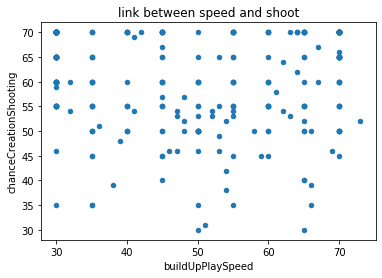

In [51]:
Team_Attributes.plot(kind='scatter',x='buildUpPlaySpeed',y='chanceCreationShooting')
plt.title('link between speed and shoot')
plt.show()

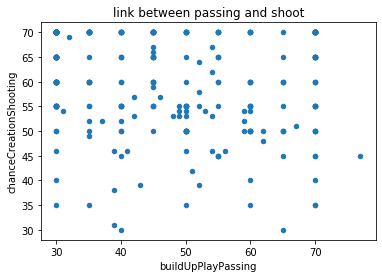

In [55]:
Team_Attributes.plot(kind='scatter',x='buildUpPlayPassing',y='chanceCreationShooting')
plt.title('link between passing and shoot')
plt.show()

At this stage we cannot clearly state which Attributes lead to victories.

In [47]:
query="""
select team_long_name,Team_Attributes.team_fifa_api_id,Team_Attributes.team_api_id,Team_Attributes.date,Team_Attributes.chanceCreationShooting,
Team_Attributes.chanceCreationShootingClass
from Team
inner join Team_Attributes
using(team_api_id)
group by team_long_name
order by chanceCreationShooting desc;"""
Team_Attributes=pd.read_sql(query,engine,parse_dates='date')
Team_Attributes
#Team_Attributes.describe()

,team_long_name,team_fifa_api_id,team_api_id,date,chanceCreationShooting,chanceCreationShootingClass
0,Śląsk Wrocław,111092,8025,2010-02-22,70,Lots
1,Zagłębie Lubin,110749,8021,2010-02-22,70,Lots
2,Xerez Club Deportivo,1742,9868,2010-02-22,70,Lots
3,Wolverhampton Wanderers,110,8602,2010-02-22,70,Lots
4,Wisła Kraków,1873,10265,2010-02-22,70,Lots
...,...,...,...,...,...,...
280,Arsenal,1,9825,2010-02-22,35,Normal
281,AJ Auxerre,57,8583,2010-02-22,35,Normal
282,FC Thun,1715,10191,2011-02-22,31,Little
283,AS Nancy-Lorraine,1823,8481,2010-02-22,30,Little


it seems that chanceCreationShooting is the only Team attributes which lead to victory.

# second part, in this part we will analyze the Players and Players_Attribute tables

## read and explore the Player table

In [19]:
query="""
SELECT * FROM 'Player';
"""
Player=pd.read_sql(query,engine)
print(Player.head())

   id  player_api_id         player_name  player_fifa_api_id  \
0   1         505942  Aaron Appindangoye              218353   
1   2         155782     Aaron Cresswell              189615   
2   3         162549         Aaron Doran              186170   
3   4          30572       Aaron Galindo              140161   
4   5          23780        Aaron Hughes               17725   

              birthday  height  weight  
0  1992-02-29 00:00:00  182.88     187  
1  1989-12-15 00:00:00  170.18     146  
2  1991-05-13 00:00:00  170.18     163  
3  1982-05-08 00:00:00  182.88     198  
4  1979-11-08 00:00:00  182.88     154  


In [24]:
Player.info()
for i,v in enumerate(Player.columns):
    print(i,v)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB
0 id
1 player_api_id
2 player_name
3 player_fifa_api_id
4 birthday
5 height
6 weight


## read and explore the Player table

In [7]:
query="""
SELECT * FROM 'Player_Attributes';
"""
Player_Attribute=pd.read_sql(query,engine)
print(Player_Attribute.head())

   id  player_fifa_api_id  player_api_id                 date  overall_rating  \
0   1              218353         505942  2016-02-18 00:00:00            67.0   
1   2              218353         505942  2015-11-19 00:00:00            67.0   
2   3              218353         505942  2015-09-21 00:00:00            62.0   
3   4              218353         505942  2015-03-20 00:00:00            61.0   
4   5              218353         505942  2007-02-22 00:00:00            61.0   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0       71.0          right              medium              medium      49.0   
1       71.0          right              medium              medium      49.0   
2       66.0          right              medium              medium      49.0   
3       65.0          right              medium              medium      48.0   
4       65.0          right              medium              medium      48.0   

   ...  vision  penalties 

In [25]:
Player_Attribute.info()
for i,v in enumerate(Player_Attribute.columns):
    print(i,v)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
id                     183978 non-null int64
player_fifa_api_id     183978 non-null int64
player_api_id          183978 non-null int64
date                   183978 non-null object
overall_rating         183142 non-null float64
potential              183142 non-null float64
preferred_foot         183142 non-null object
attacking_work_rate    180748 non-null object
defensive_work_rate    183142 non-null object
crossing               183142 non-null float64
finishing              183142 non-null float64
heading_accuracy       183142 non-null float64
short_passing          183142 non-null float64
volleys                181265 non-null float64
dribbling              183142 non-null float64
curve                  181265 non-null float64
free_kick_accuracy     183142 non-null float64
long_passing           183142 non-null float64
ball_control           183142 non-null float64
accele

## joining table
Player and Player_Attribute

In [24]:
query="""
select Player.player_name,Player_Attributes.player_fifa_api_id, Player_Attributes.player_api_id,Player_Attributes.overall_rating,Player_Attributes.attacking_work_rate,Player_Attributes.defensive_work_rate,Player_Attributes.crossing,Player_Attributes.finishing,Player_Attributes.heading_accuracy,
Player_Attributes.short_passing,Player_Attributes.ball_control,Player_Attributes.acceleration,Player_Attributes.sprint_speed,Player_Attributes.penalties
from Player
inner join Player_Attributes
using(player_fifa_api_id);
"""
Players=pd.read_sql(query,engine)
Players.head()

,player_name,player_fifa_api_id,player_api_id,overall_rating,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,ball_control,acceleration,sprint_speed,penalties
0,Aaron Appindangoye,218353,505942,67.0,medium,medium,49.0,44.0,71.0,61.0,49.0,60.0,64.0,48.0
1,Aaron Appindangoye,218353,505942,67.0,medium,medium,49.0,44.0,71.0,61.0,49.0,60.0,64.0,48.0
2,Aaron Appindangoye,218353,505942,62.0,medium,medium,49.0,44.0,71.0,61.0,49.0,60.0,64.0,48.0
3,Aaron Appindangoye,218353,505942,61.0,medium,medium,48.0,43.0,70.0,60.0,48.0,60.0,64.0,47.0
4,Aaron Appindangoye,218353,505942,61.0,medium,medium,48.0,43.0,70.0,60.0,48.0,60.0,64.0,47.0


In [28]:
query="""
select Player.player_name,Player_Attributes.penalties
from Player
inner join Player_Attributes
using(player_fifa_api_id);
"""
Player=pd.read_sql(query,engine)
Player.describe()

,penalties
count,183142.000000
mean,55.003986
std,15.546519
min,2.000000
25%,45.000000
50%,57.000000
75%,67.000000
max,96.000000


## Which players have the most penalities?

In [38]:
query="""
select distinct Player.player_name,Player_Attributes.penalties,Player_Attributes.attacking_work_rate,Player_Attributes.overall_rating,Player_Attributes.ball_control,Player_Attributes.sprint_speed
from Player
inner join Player_Attributes
using(player_fifa_api_id)
group by player_name
order by penalties desc;
"""
Player=pd.read_sql(query,engine)
Player.head(20)

,player_name,penalties,attacking_work_rate,overall_rating,ball_control,sprint_speed
0,Rickie Lambert,96,high,75,75,46
1,Mario Balotelli,92,low,79,87,76
2,David Villa,92,high,81,84,72
3,Zlatan Ibrahimovic,91,medium,89,90,74
4,Michael Ballack,91,medium,80,82,60
5,Timmy Simons,90,medium,73,68,53
6,Ryan Giggs,90,medium,78,79,60
7,Ruud van Nistelrooy,90,medium,77,74,52
8,Paolo Maldini,90,None,77,76,55
9,Leighton Baines,90,high,82,76,75


## is there a link between Attacking_work_rate and Penalties, overall_rating,ball_control,sprint_speed

In [49]:
query="""
select avg(penalties),attacking_work_rate,avg(overall_rating),avg(ball_control),avg(sprint_speed)
from Player_Attributes
group by attacking_work_rate
order by penalties desc;
"""
attack=pd.read_sql(query,engine)
attack.head()

,avg(penalties),attacking_work_rate,avg(overall_rating),avg(ball_control),avg(sprint_speed)
0,50.726456,low,68.889719,59.851091,61.260124
1,54.397912,None,66.301182,59.935697,66.104424
2,60.628541,high,70.590570,70.774911,75.589333
3,58.548077,le,65.230769,59.153846,67.144231
4,53.279460,medium,68.015951,61.295554,66.058135


## link between penalties and sprint_speed

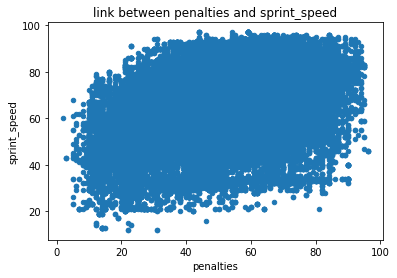

In [56]:
query="""
select penalties,sprint_speed
from Player_Attributes
;
"""
Player=pd.read_sql(query,engine)
Player.plot(kind='scatter',x='penalties',y='sprint_speed')
plt.title('link between penalties and sprint_speed')
plt.show()

there's a link between speed and penalties, more your sprint_speed is high the higher is the chance that you score on penalties.

# Conclusions

This a large scale database requiring SQL, there are a lot of datas whhich require advance statiscal analysis tools.